<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
Y = data['Class'].to_numpy()
print(type(Y))
print(Y)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()
# Fit the scaler to the data and transform it
X = transform.fit_transform(X)
print("Mean of each feature:", X.mean(axis=0))
print("Standard deviation of each feature:", X.std(axis=0))

Mean of each feature: [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17 -4.81096644e-17 -2.86807615e-17 -7.40148683e-18
 -4.81096644e-17  4.68760833e-17  6.16790569e-18  0.00000000e+00
 -6.90805438e-17 -2.86807615e-17 -5.24271984e-17  1.78869265e-17
 -8.14163551e-17  2.71387850e-17  5.30439890e-17  5.30439890e-17
 -1.41861831e-17 -1.48029737e-17  6.16790569e-18  3.08395285e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -3.70074342e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17  5.55111512e-18 -4.81096644e-17  5.55111512e-18
  5.55111512e-18 -4.81096644e-17  5.55111512e-18  5.55111512e-18
 -4.81096644e-17 -4.81096644e-17  5.55111512e-18  5.55111512e-18
 -7

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Assuming 'data' and 'X' are already loaded
Y = data['Class'].to_numpy()

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [11]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the logistic regression object
lr = LogisticRegression()

# Define the parameter grid
parameters = {
    "C": [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create the GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)
print("Type of logreg_cv:", type(logreg_cv))
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)
from sklearn.metrics import accuracy_score

Y_pred = logreg_cv.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.83
Test set accuracy: 0.8333333333333334
Type of logreg_cv: <class 'sklearn.model_selection._search.GridSearchCV'>
Shape of X_test: (18, 83)
Shape of Y_test: (18,)
Test set accuracy: 0.8333333333333334


Lets look at the confusion matrix:


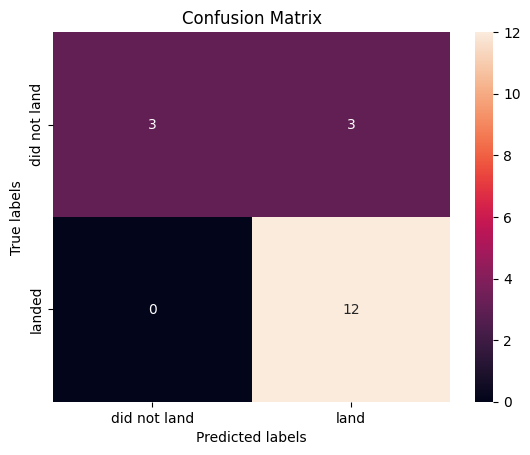

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
# Create the GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the data
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test set accuracy: {svm_test_accuracy:.2f}")
print(f"Best cross-validation score: {svm_cv.best_score_:.2f}")
print(f"SVM Test set accuracy: {svm_test_accuracy:.2f}")
from sklearn.metrics import classification_report

Y_pred = svm_cv.predict(X_test)
print(classification_report(Y_test, Y_pred))

SVM Test set accuracy: 0.83
Best cross-validation score: 0.85
SVM Test set accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



We can plot the confusion matrix


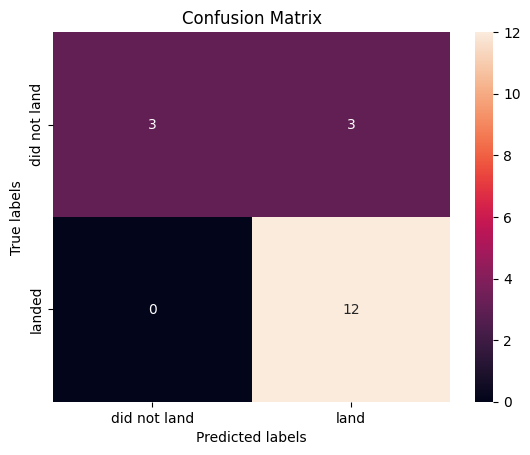

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Classifier object
tree = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the data
tree_cv.fit(X_train, Y_train)
print("Best parameters found: ", tree_cv.best_params_)
print("Best cross-validation score: ", tree_cv.best_score_)
Y_pred = tree_cv.predict(X_test)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test set accuracy: {tree_test_accuracy:.2f}")

Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score:  0.8196428571428571
Decision Tree Test set accuracy: 0.83


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the KNN object
knn = KNeighborsClassifier()

# Create the GridSearchCV object
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the GridSearchCV object to the data
knn_cv.fit(X_train, Y_train)

print("Best parameters found: ", knn_cv.best_params_)
print("Best cross-validation score: ", knn_cv.best_score_)

# Use the best estimator for prediction and scoring
Y_pred = knn_cv.best_estimator_.predict(X_test)
knn_test_accuracy = knn_cv.best_estimator_.score(X_test, Y_test)
print(f"KNN Test set accuracy: {knn_test_accuracy:.2f}")

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score:  0.8482142857142858
KNN Test set accuracy: 0.83


We can plot the confusion matrix


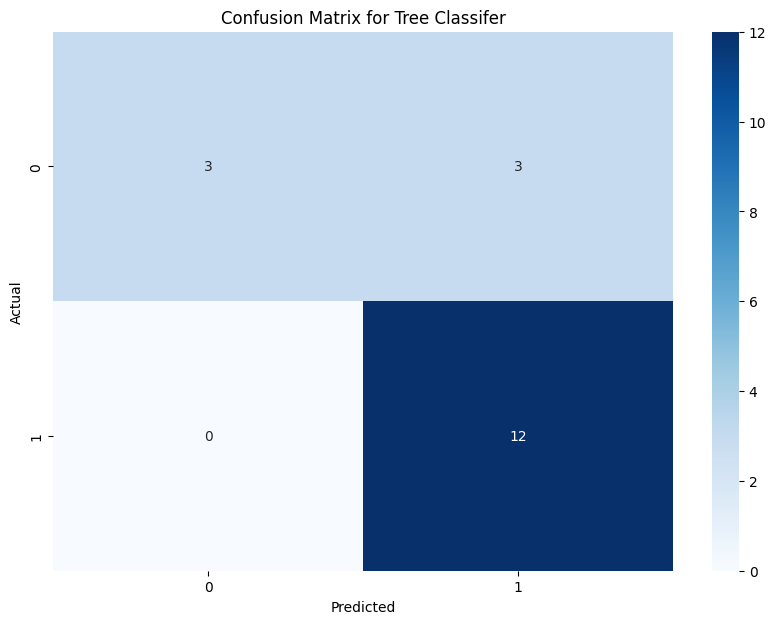

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tree Classifer')

plt.show()

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
import numpy as np

# Load a sample dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a k nearest neighbors object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the object to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", knn_cv.best_params_)
print("Best cross-validation score: ", knn_cv.best_score_)

# Optional: Evaluate the model on the test set
test_score = knn_cv.score(X_test, y_test)
print(f"Test set accuracy: {test_score:.4f}")

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score:  0.9583333333333334
Test set accuracy: 1.0000


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
import numpy as np

# Load a sample dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a k nearest neighbors object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the object to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", knn_cv.best_params_)
print("Best cross-validation score: ", knn_cv.best_score_)

# Calculate the accuracy on the test data using the score method
test_accuracy = knn_cv.score(X_test, y_test)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score:  0.9583333333333334
Accuracy on test data: 1.0000


We can plot the confusion matrix


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score:  0.9583333333333334
Accuracy on test data: 1.0000


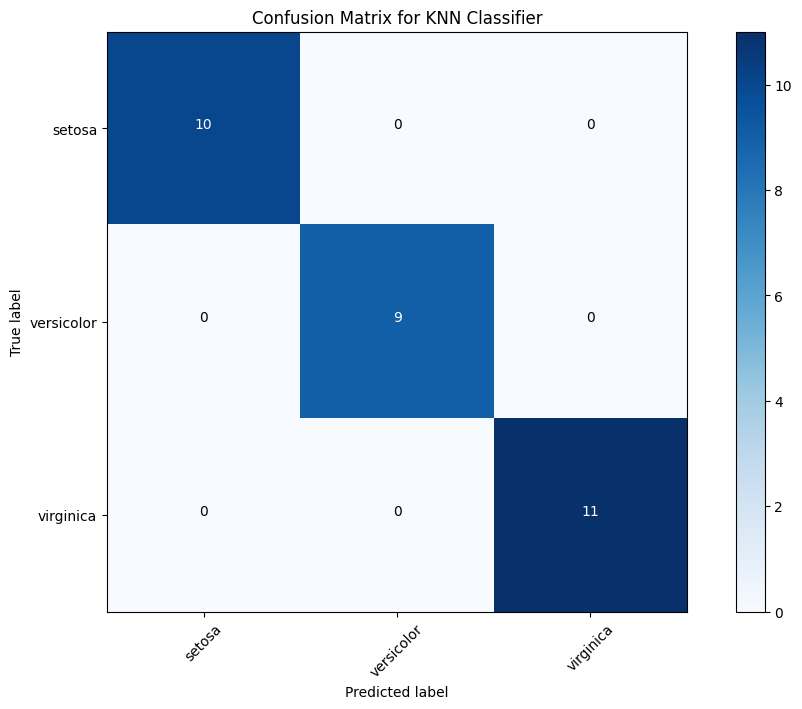

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a k nearest neighbors object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the object to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", knn_cv.best_params_)
print("Best cross-validation score: ", knn_cv.best_score_)

# Make predictions on the test set
y_pred = knn_cv.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## TASK  12


Find the method performs best:


Cross-validation scores: [0.55555556 0.44444444 0.55555556 0.77777778 0.66666667]
Mean CV score: 0.6


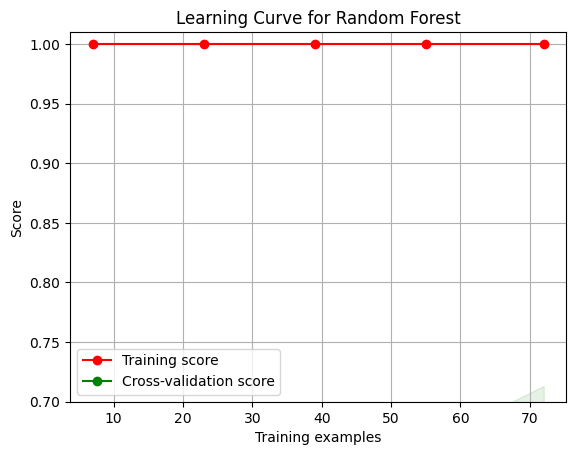

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, Y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

estimator = RandomForestClassifier(random_state=42)
plot_learning_curve(estimator, "Learning Curve for Random Forest", X, Y, ylim=(0.7, 1.01), cv=5)
plt.show()

In [42]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

results = []
for name, model in models:
    scores = cross_val_score(model, X_scaled, Y, cv=5)
    results.append({
        'Model': name,
        'Mean CV Score': scores.mean(),
        'Std CV Score': scores.std(),
        'CV Scores': scores
    })

results.sort(key=lambda x: x['Mean CV Score'], reverse=True)

for result in results:
    print(f"{result['Model']}:")
    print(f"  Mean CV Score: {result['Mean CV Score']:.4f} (+/- {result['Std CV Score']*2:.4f})")
    print(f"  CV Scores: {result['CV Scores']}")
    print()

best_model = max(results, key=lambda x: x['Mean CV Score'])
print(f"Best performing model: {best_model['Model']}")
print(f"Best mean CV score: {best_model['Mean CV Score']:.4f}")

KNN:
  Mean CV Score: 0.6556 (+/- 0.2373)
  CV Scores: [0.55555556 0.5        0.72222222 0.83333333 0.66666667]

SVM:
  Mean CV Score: 0.6556 (+/- 0.0444)
  CV Scores: [0.66666667 0.61111111 0.66666667 0.66666667 0.66666667]

Gradient Boosting:
  Mean CV Score: 0.6000 (+/- 0.2266)
  CV Scores: [0.55555556 0.44444444 0.55555556 0.77777778 0.66666667]

Logistic Regression:
  Mean CV Score: 0.5889 (+/- 0.1937)
  CV Scores: [0.44444444 0.5        0.66666667 0.66666667 0.66666667]

Random Forest:
  Mean CV Score: 0.5778 (+/- 0.2288)
  CV Scores: [0.55555556 0.38888889 0.55555556 0.72222222 0.66666667]

Best performing model: KNN
Best mean CV score: 0.6556


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1246, in fit
    raise ValueError(
ValueError: This solver needs samples of at le

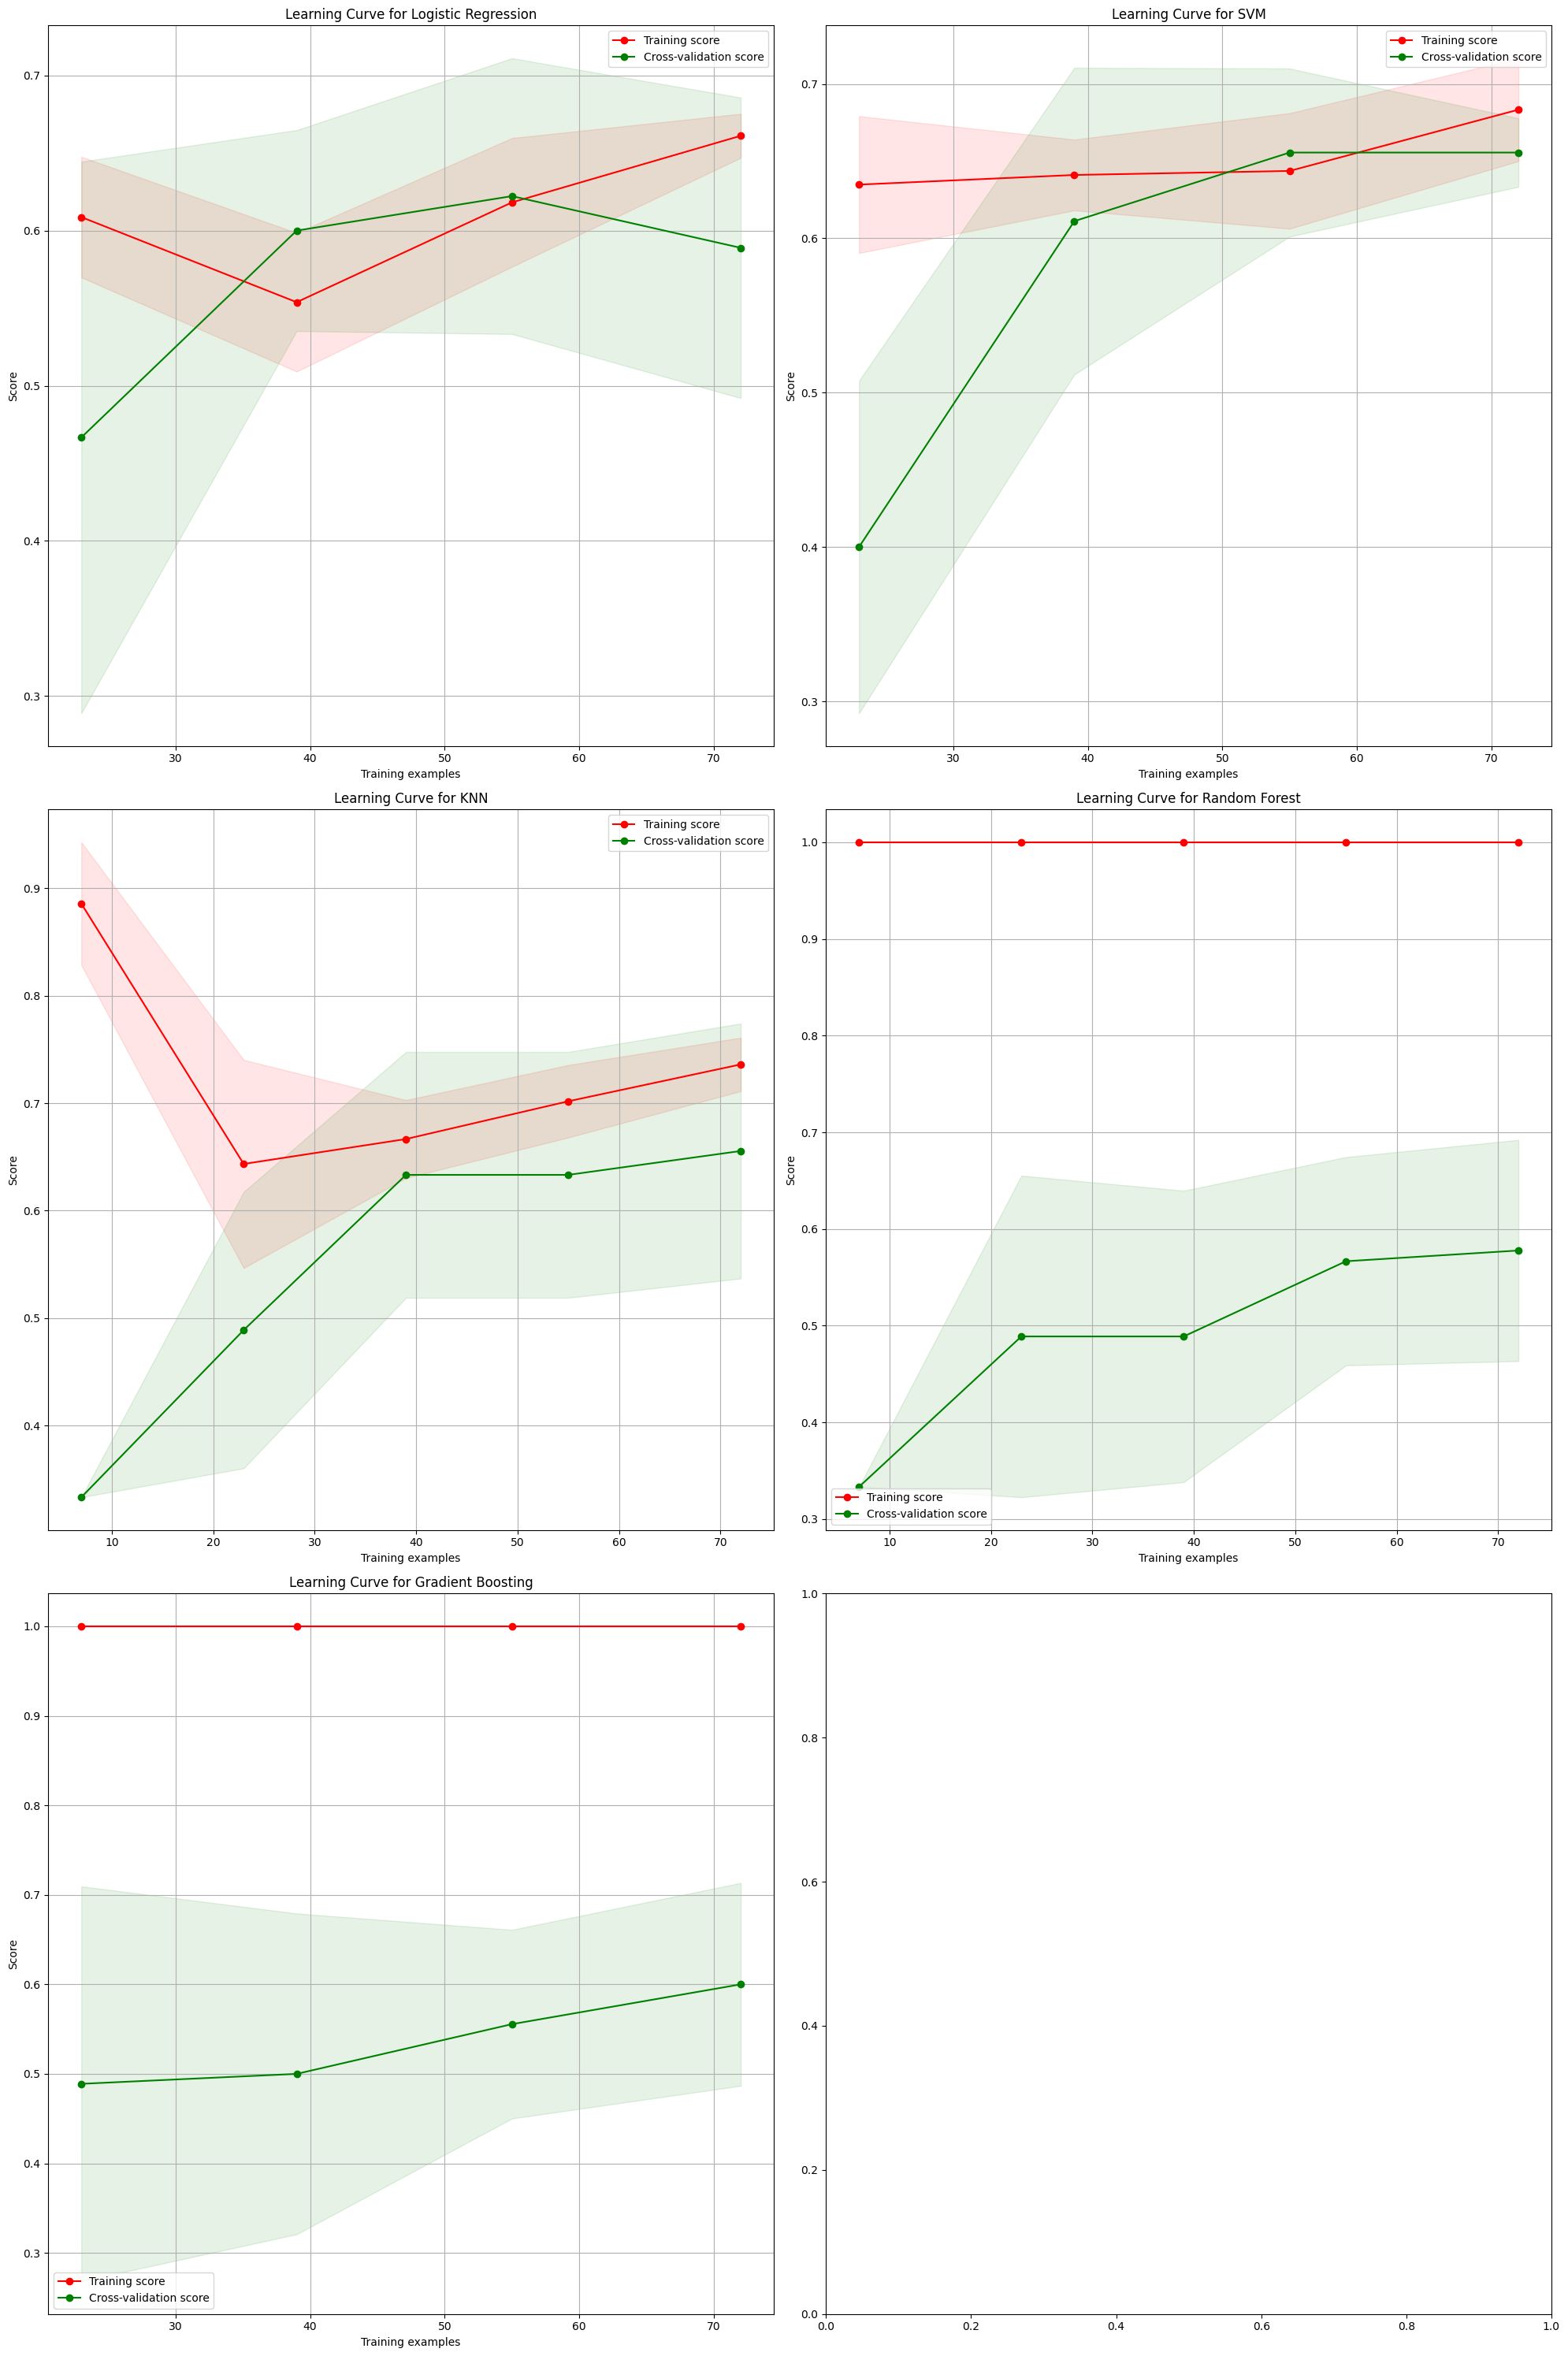

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.ravel()

for idx, (name, model) in enumerate(models):
    plot_learning_curve(model, f"Learning Curve for {name}",
                        X_scaled, Y, axes=axes[idx], cv=5)

plt.tight_layout()
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
